In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('heart failure.csv')

In [3]:
dataset.shape

(299, 13)

In [4]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Analysis

In [5]:
#checking for the nan values
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]
features_nan
#no nan values

[]

In [6]:
#fetching the time col
time=[feature for feature in dataset.columns if feature=='time']

In [7]:
continuous_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=='float']

In [8]:
continuous_feature

['age', 'platelets', 'serum_creatinine']

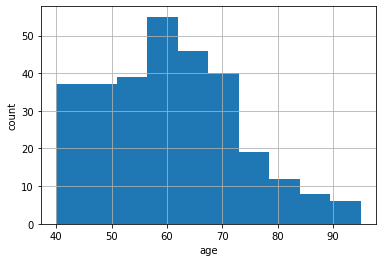

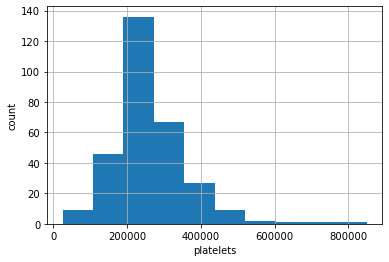

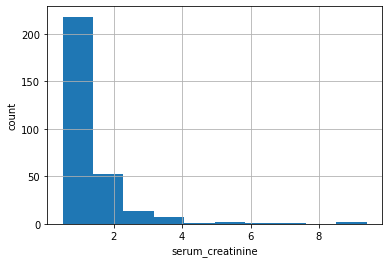

In [9]:
for feature in continuous_feature:
    dataset[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#for the age the person age between 55-63 had more check ups or tests
#platelets the avg platelets have been around 200000-300000
#serum_creatinine is almost 1-1.8 avg


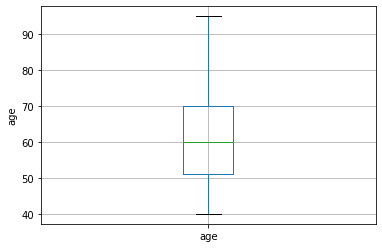

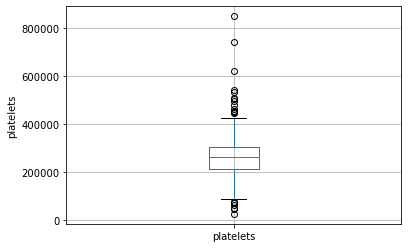

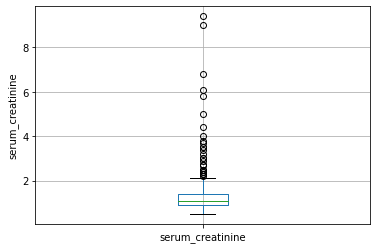

In [10]:
#checking for the outliers
for feature in continuous_feature:
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

#serum_creatinine and the platelets have got greater outliers

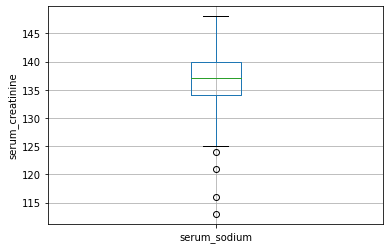

In [11]:
dataset.boxplot(column='serum_sodium')
plt.ylabel(feature)
plt.show()

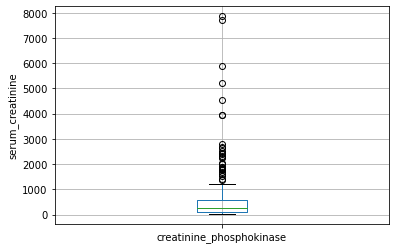

In [12]:
dataset.boxplot(column='creatinine_phosphokinase')
plt.ylabel(feature)
plt.show()

In [13]:
discrete_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=='int64']
discrete_feature

['anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

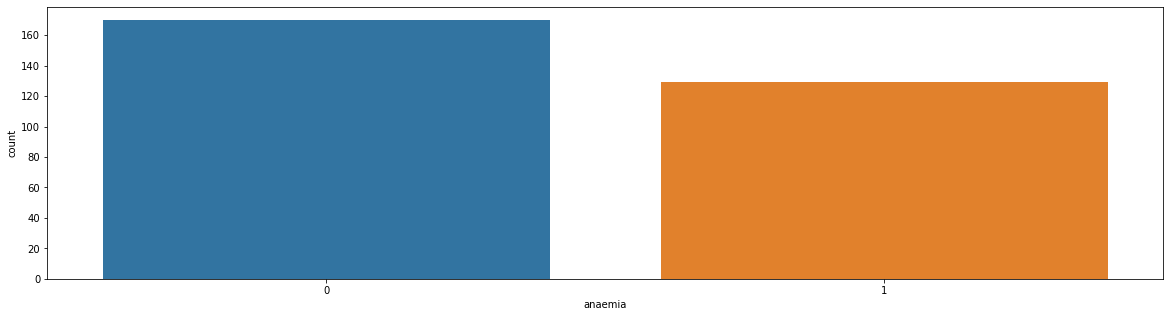

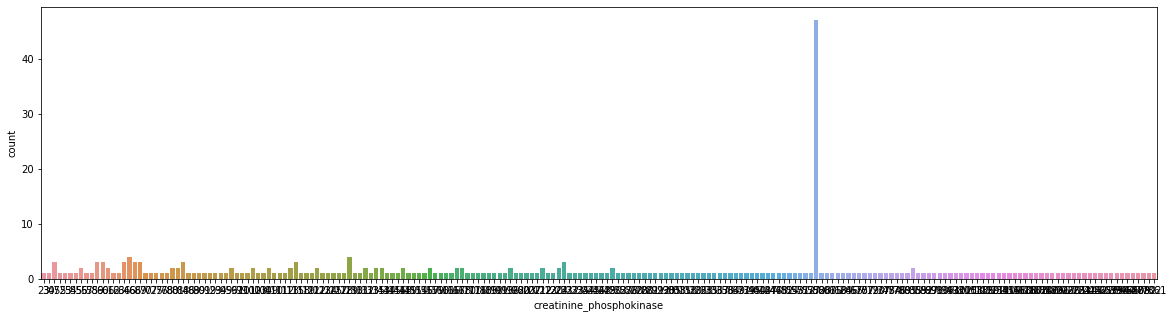

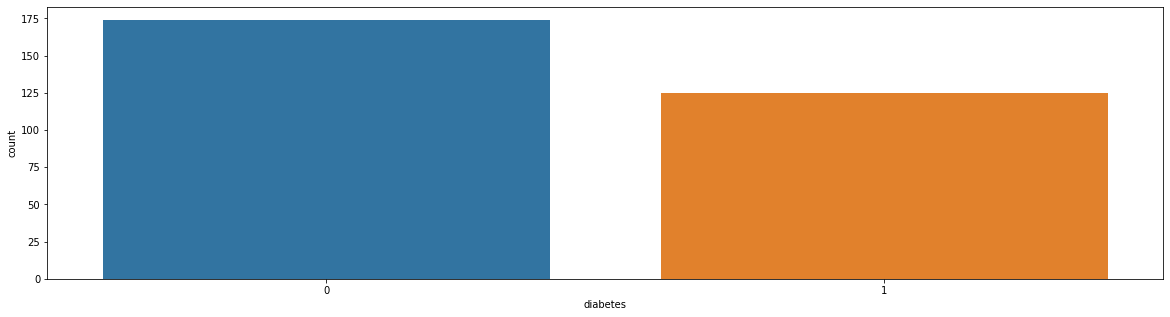

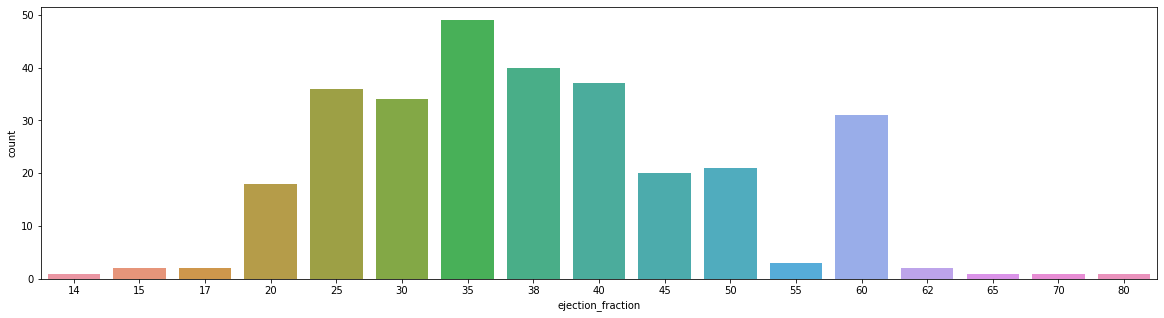

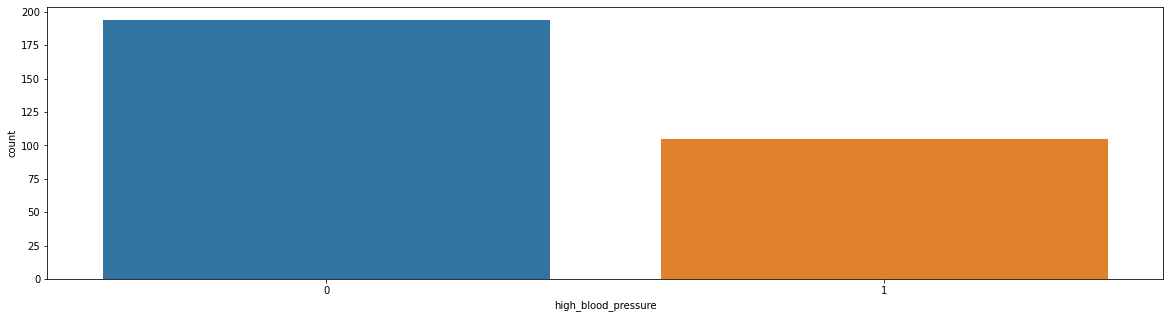

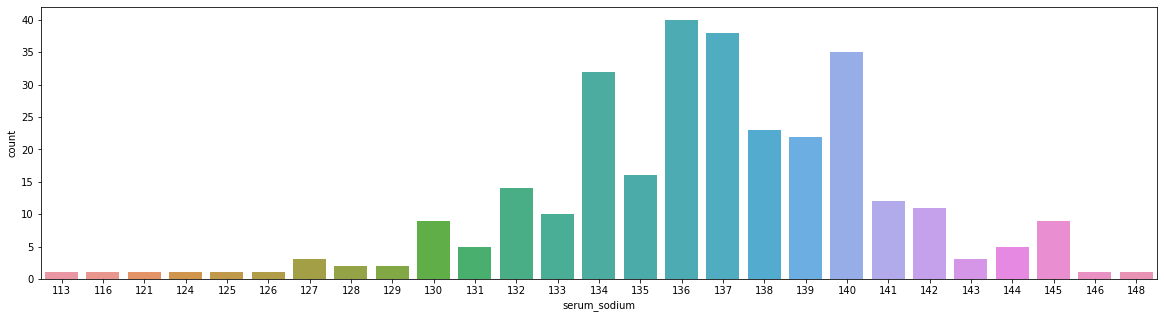

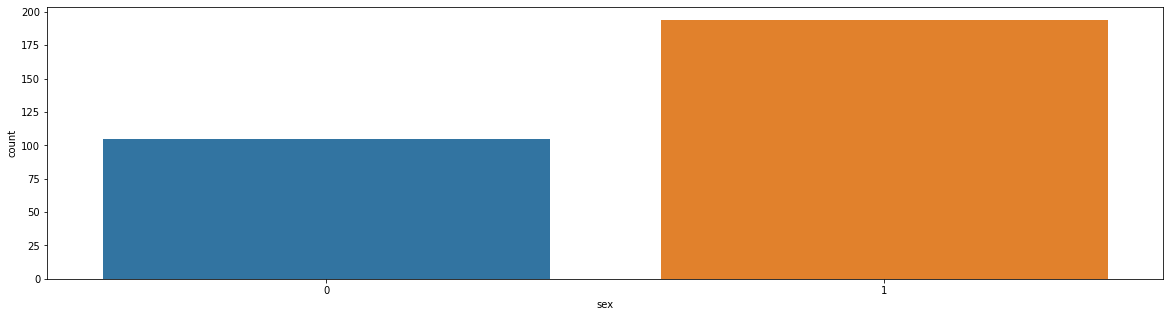

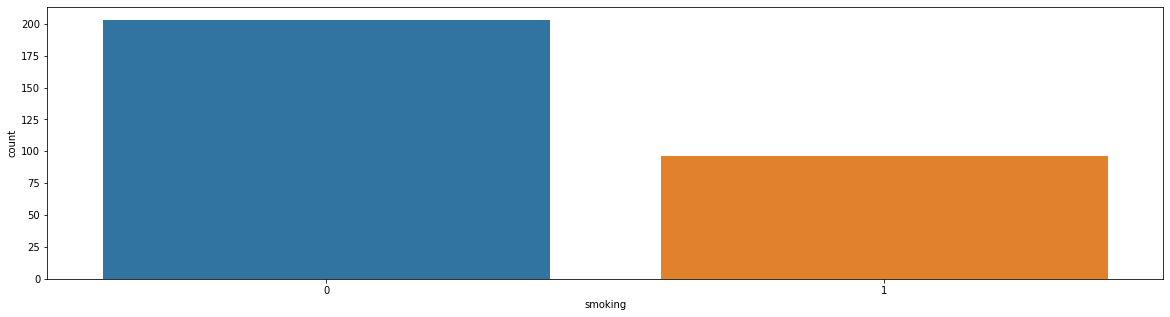

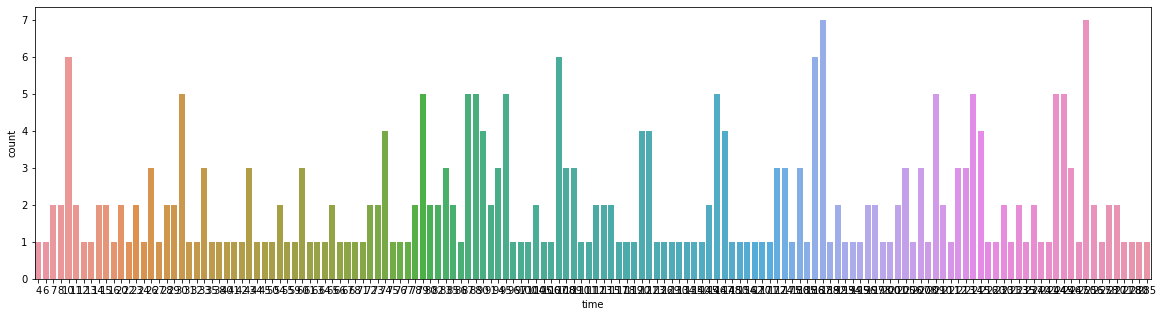

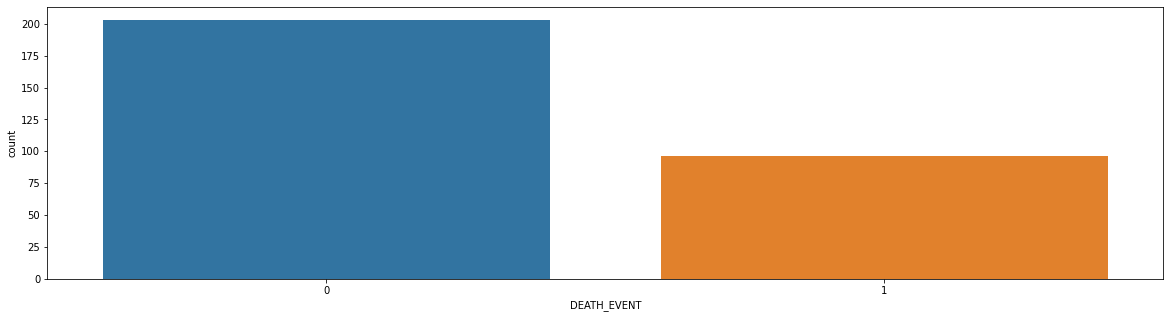

In [14]:
for feature in discrete_feature:
    plt.figure(figsize = (20,5))
    sns.countplot(x=feature, data=dataset)
    plt.show()

#anaemia mostly there is no decrease in red blood cells
#mostly people are non-diabetic
#ejection is the prcentage of blood leaving is mostly 35%
#there is mostly no high blood pressure
#Level of serum creatinine in the blood is mostly 136
#for the sex moslty people are male
#greater number of people donot smoke
#greater number of people didnot died


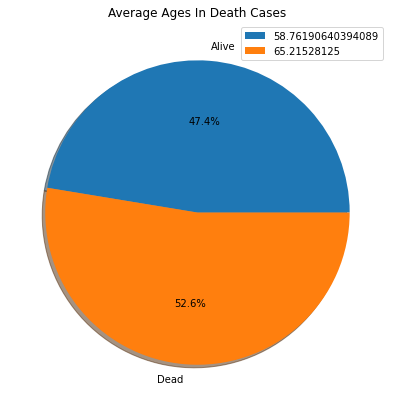

In [15]:
#checking the realtion between death_event and age
plt.figure(figsize=(10, 7))
death_age = dataset.groupby('DEATH_EVENT')['age'].mean()
plt.pie(death_age, autopct='%.1f%%', labels=['Alive', 'Dead'], shadow=True)
plt.title('Average Ages In Death Cases')
plt.legend(death_age, loc='upper right')
plt.show()
#avg people who died were of 65 age and the one who survived were of age 58

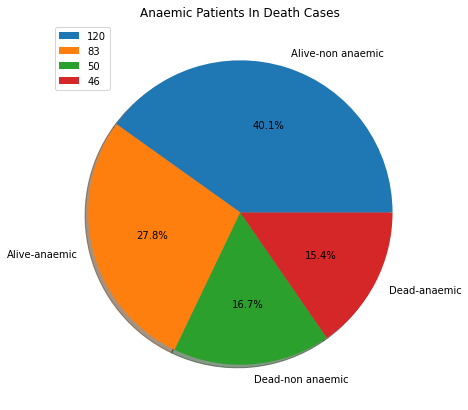

In [16]:
#checking the realtion between death_event and anaemia
plt.figure(figsize=(10, 7))
death_anae = dataset.groupby('DEATH_EVENT')['anaemia'].value_counts()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_anae, autopct='%.1f%%', labels=['Alive-non anaemic', 'Alive-anaemic', 'Dead-non anaemic', 'Dead-anaemic'], shadow=True)
plt.title('Anaemic Patients In Death Cases')
plt.legend(death_anae, loc='upper left')
plt.show()
#due to aneamic very less people died
#there were greater number of people who were alive and were non-anaemic

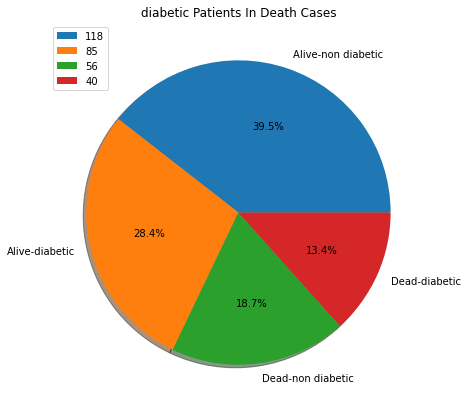

In [17]:
#checking the realtion between death_event and diabetic

plt.figure(figsize=(10, 7))
death_diab = dataset.groupby('DEATH_EVENT')['diabetes'].value_counts()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_diab, autopct='%.1f%%', labels=['Alive-non diabetic', 'Alive-diabetic', 'Dead-non diabetic', 'Dead-diabetic'], shadow=True)
plt.title('diabetic Patients In Death Cases')
plt.legend(death_diab, loc='upper left')
plt.show()

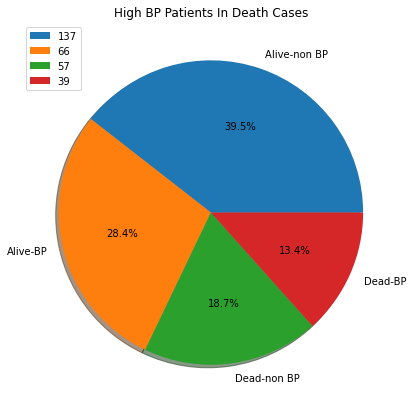

In [18]:
#checking the realtion between death_event and BP

plt.figure(figsize=(10, 7))
death_bp = dataset.groupby('DEATH_EVENT')['high_blood_pressure'].value_counts()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_diab, autopct='%.1f%%', labels=['Alive-non BP', 'Alive-BP', 'Dead-non BP', 'Dead-BP'], shadow=True)
plt.title('High BP Patients In Death Cases')
plt.legend(death_bp, loc='upper left')
plt.show()

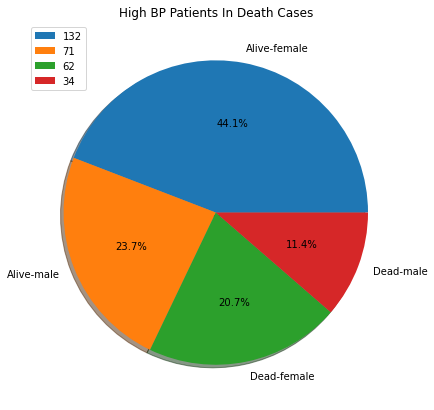

In [19]:
#checking the realtion between death_event and sex

plt.figure(figsize=(10, 7))
death_sex = dataset.groupby('DEATH_EVENT')['sex'].value_counts()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_sex, autopct='%.1f%%', labels=['Alive-female', 'Alive-male', 'Dead-female', 'Dead-male'], shadow=True)
plt.title('High BP Patients In Death Cases')
plt.legend(death_sex, loc='upper left')
plt.show()

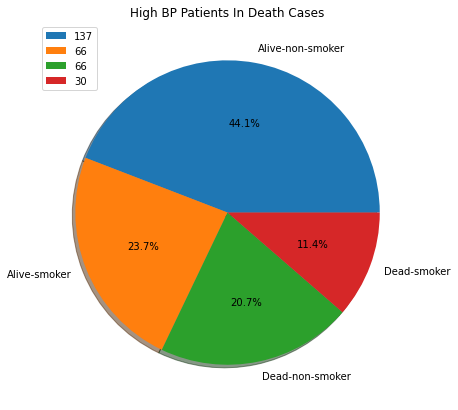

In [20]:
#checking the realtion between death_event and smoking
plt.figure(figsize=(10, 7))
death_smoke = dataset.groupby('DEATH_EVENT')['smoking'].value_counts()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_sex, autopct='%.1f%%', labels=['Alive-non-smoker', 'Alive-smoker', 'Dead-non-smoker', 'Dead-smoker'], shadow=True)
plt.title('High BP Patients In Death Cases')
plt.legend(death_smoke, loc='upper left')
plt.show()

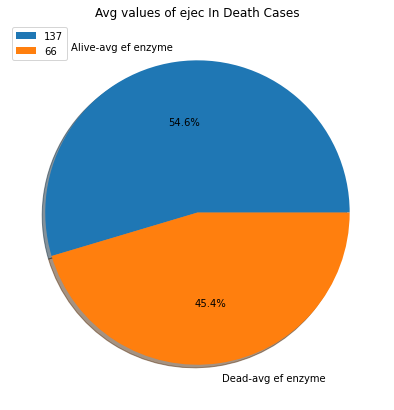

In [21]:
#checking the realtion between death_event and ejction fraction
plt.figure(figsize=(10, 7))
death_ejec = dataset.groupby('DEATH_EVENT')['ejection_fraction'].mean()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_ejec, autopct='%.1f%%', labels=['Alive-avg ef enzyme', 'Dead-avg ef enzyme'], shadow=True)
plt.title('Avg values of ejec In Death Cases')
plt.legend(death_smoke, loc='upper left')
plt.show()

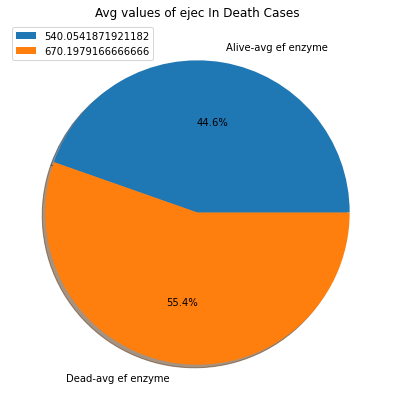

In [22]:
#checking the realtion between death_event and creatinine_phosphokinase
plt.figure(figsize=(10, 7))
death_enzyme = dataset.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_enzyme, autopct='%.1f%%', labels=['Alive-avg ef enzyme', 'Dead-avg ef enzyme'], shadow=True)
plt.title('Avg values of ejec In Death Cases')
plt.legend(death_enzyme, loc='upper left')
plt.show()

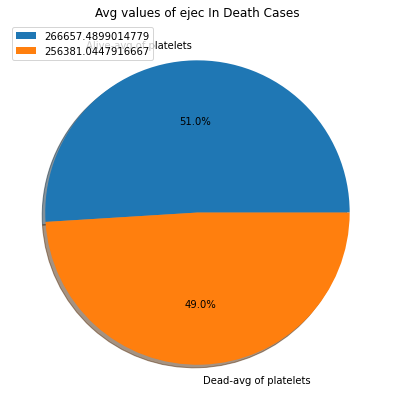

In [23]:
#checking relation between the death_event and platelets
plt.figure(figsize=(10, 7))
death_plat = dataset.groupby('DEATH_EVENT')['platelets'].mean()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_plat, autopct='%.1f%%', labels=['Alive-avg of platelets', 'Dead-avg of platelets'], shadow=True)
plt.title('Avg values of ejec In Death Cases')
plt.legend(death_plat, loc='upper left')
plt.show()

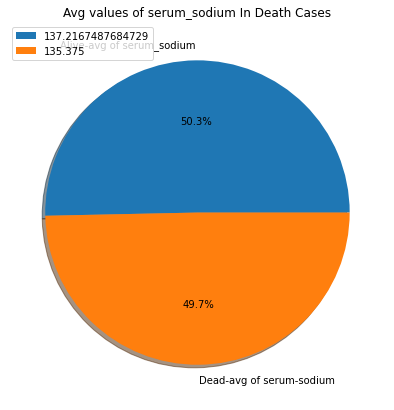

In [24]:
#checking relation between the death_event and serum sodium
plt.figure(figsize=(10, 7))
death_sod = dataset.groupby('DEATH_EVENT')['serum_sodium'].mean()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_sod, autopct='%.1f%%', labels=['Alive-avg of serum_sodium', 'Dead-avg of serum-sodium'], shadow=True)
plt.title('Avg values of serum_sodium In Death Cases')
plt.legend(death_sod, loc='upper left')
plt.show()

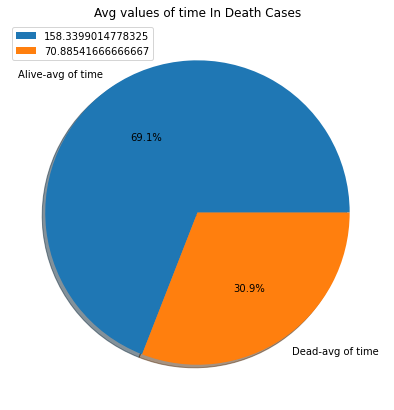

In [25]:
#checking relation between the death_event and time
plt.figure(figsize=(10, 7))
death_time = dataset.groupby('DEATH_EVENT')['time'].mean()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_time, autopct='%.1f%%', labels=['Alive-avg of time', 'Dead-avg of time'], shadow=True)
plt.title('Avg values of time In Death Cases')
plt.legend(death_time, loc='upper left')
plt.show()

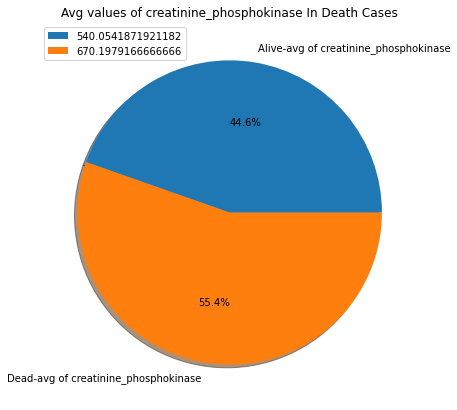

In [26]:
#checking relation between the death_event and time
plt.figure(figsize=(10, 7))
death_creat = dataset.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_creat, autopct='%.1f%%', labels=['Alive-avg of creatinine_phosphokinase', 'Dead-avg of creatinine_phosphokinase'], shadow=True)
plt.title('Avg values of creatinine_phosphokinase In Death Cases')
plt.legend(death_creat, loc='upper left')
plt.show()

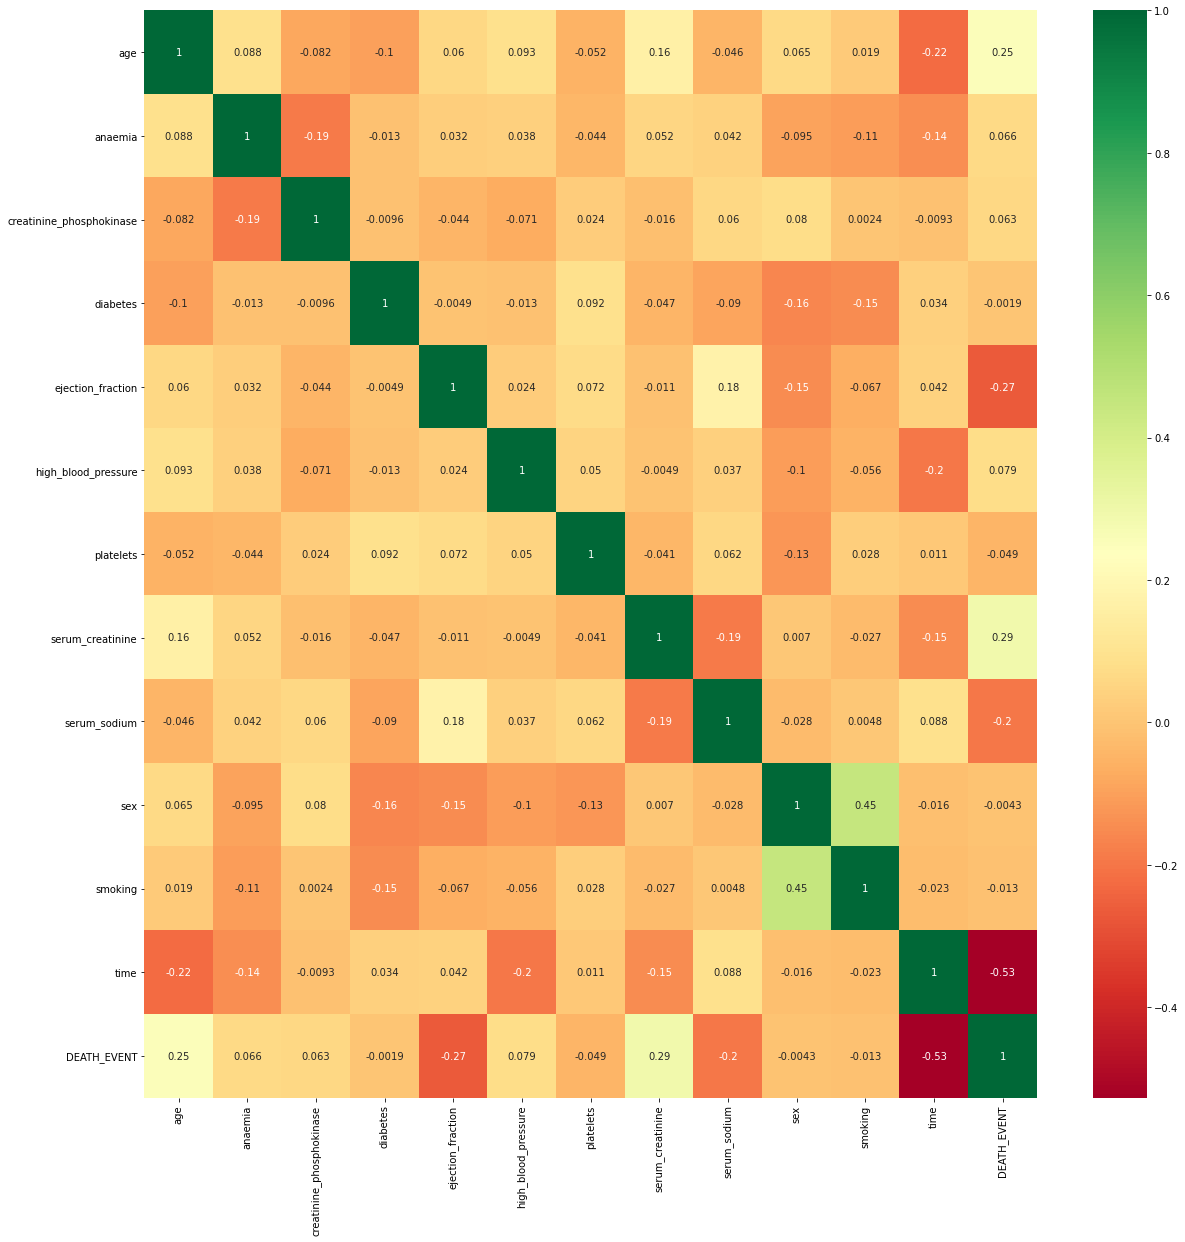

In [27]:
#plotting the heat map of the features
corrmat=dataset.corr() 
#getting those cols
top_corr_features=corrmat.index
plt.figure(figsize=(20,20)) 
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Feature Engineering

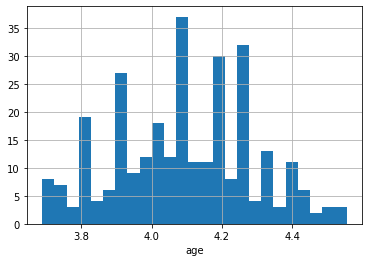

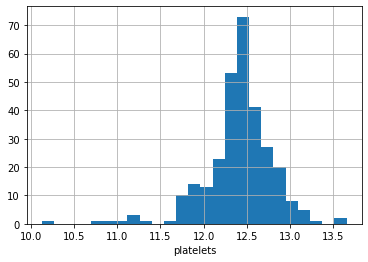

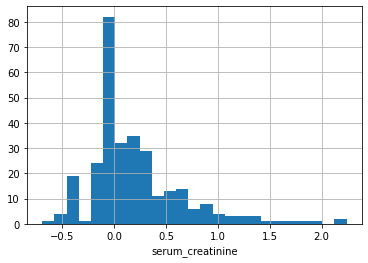

In [28]:
#continuous values to normal or gussian distribution
for feature in continuous_feature:
    #here we are setting condition of 0 becz log 0 is not defined
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
#        plt.scatter(data[feature], data['SalePrice'])
        dataset[feature].hist(bins=25)
        plt.xlabel(feature)
        #plt.ylabel('SalePrice')
        plt.show()

In [29]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,4.317488,0,582,0,20,1,12.487485,0.641854,130,1,0,4,1
1,4.007333,0,7861,0,38,0,12.481270,0.095310,136,1,0,6,1
2,4.174387,0,146,0,20,0,11.995352,0.262364,129,1,1,7,1
3,3.912023,1,111,0,20,0,12.254863,0.641854,137,1,0,7,1
4,4.174387,1,160,1,20,0,12.697715,0.993252,116,0,0,8,1


In [30]:
# Removing outliers
q1 = dataset.platelets.quantile(0.25)
q3 = dataset.platelets.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'platelets'] > toprange:
        dataset.loc[i, 'platelets'] = toprange
    if dataset.loc[i, 'platelets'] < botrange:
        dataset.loc[i, 'platelets'] = botrange

In [31]:
# Removing outliers
q1 = dataset['serum_creatinine'].quantile(0.25)
q3 = dataset['serum_creatinine'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'serum_creatinine'] > toprange:
        dataset.loc[i, 'serum_creatinine'] = toprange
    if dataset.loc[i, 'serum_creatinine'] < botrange:
        dataset.loc[i, 'serum_creatinine'] = botrange

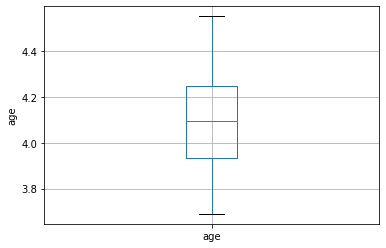

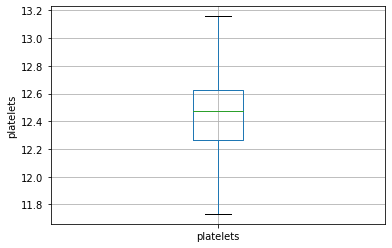

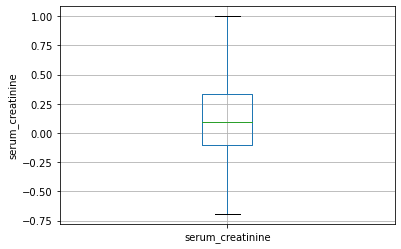

In [32]:
for feature in continuous_feature:
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

In [33]:
q1 = dataset['serum_sodium'].quantile(0.25)
q3 = dataset['serum_sodium'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'serum_sodium'] > toprange:
        dataset.loc[i, 'serum_sodium'] = toprange
    if dataset.loc[i, 'serum_sodium'] < botrange:
        dataset.loc[i, 'serum_sodium'] = botrange

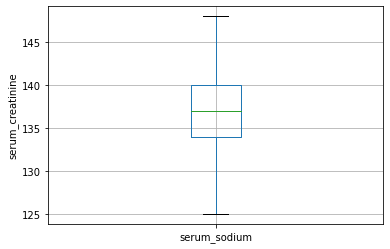

In [34]:
dataset.boxplot(column='serum_sodium')
plt.ylabel(feature)
plt.show()

In [35]:
q1 = dataset['creatinine_phosphokinase'].quantile(0.25)
q3 = dataset['creatinine_phosphokinase'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'creatinine_phosphokinase'] > toprange:
        dataset.loc[i, 'creatinine_phosphokinase'] = toprange
    if dataset.loc[i, 'creatinine_phosphokinase'] < botrange:
        dataset.loc[i, 'creatinine_phosphokinase'] = botrange

In [36]:
feature_scale=[feature for feature in dataset.columns if feature not in ['DEATH_EVENT']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [37]:
data = pd.concat([dataset[['DEATH_EVENT']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [38]:
data.head(50)

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,0.726717,0.0,0.444621,0.0,0.090909,1.0,0.529858,0.788836,0.217391,1.0,0.0,0.000000
1,1,0.368156,0.0,1.000000,0.0,0.363636,0.0,0.525498,0.465890,0.478261,1.0,0.0,0.007117
2,1,0.561282,0.0,0.097833,0.0,0.090909,0.0,0.184686,0.564600,0.173913,1.0,1.0,0.010676
3,1,0.257970,1.0,0.069994,0.0,0.090909,0.0,0.366702,0.788836,0.521739,1.0,0.0,0.010676
4,1,0.561282,1.0,0.108968,1.0,0.090909,0.0,0.677309,0.996473,0.000000,0.0,0.0,0.014235
5,1,0.937494,1.0,0.019089,0.0,0.393939,1.0,0.346370,0.847974,0.304348,1.0,1.0,0.014235
6,1,0.726717,1.0,0.177371,0.0,0.015152,0.0,0.013964,0.517304,0.521739,1.0,0.0,0.021352
7,1,0.468747,1.0,0.232253,1.0,0.696970,0.0,0.907457,0.465890,0.260870,1.0,1.0,0.021352
8,1,0.561282,0.0,0.106582,0.0,0.772727,0.0,0.525498,0.649157,0.565217,0.0,0.0,0.021352
9,1,0.801329,1.0,0.079539,0.0,0.318182,1.0,0.797276,1.000000,0.347826,1.0,1.0,0.021352


## Feature Selection

In [39]:
Y=data['DEATH_EVENT']
X=data.drop(columns=['DEATH_EVENT'],axis=1)

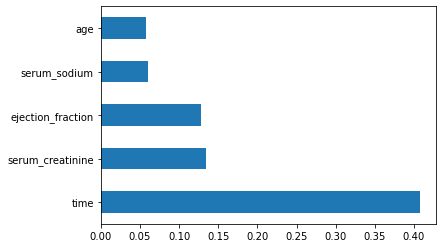

In [40]:
#plot graph of feature importances for better visualization
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [42]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X,Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [43]:
feature_sel_model.get_support()

array([ True, False,  True, False,  True, False, False,  True,  True,
        True, False,  True])

In [44]:
selected_col=X.columns[feature_sel_model.get_support()]
X=X[selected_col]
X.shape

(299, 7)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipline=Pipeline([
    ('std_scaler',StandardScaler())#here we call the standardscale func which is feature scalling
])
X=my_pipline.fit_transform(X)
X.shape

(299, 7)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.1, random_state=1)

## Model Selection

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
#clf = RandomForestClassifier()
#clf.fit(X_train, y_train)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [51]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [52]:
rf = RandomForestClassifier()

In [53]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 20, verbose=2, random_state=42, n_jobs = 1)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 20 folds for each of 20 candidates, totalling 400 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=9

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=15, max_features=auto

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_f

[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.9s
[CV] END max_dep

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=25, m

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END max_depth=30, m

RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
predictions=rf_random.predict(X_test)

In [59]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R_square score: ", r2_score(y_test,predictions))

MAE: 0.1
MSE: 0.1
RMSE: 0.31622776601683794
R_square score:  0.48863636363636354


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='Density'>

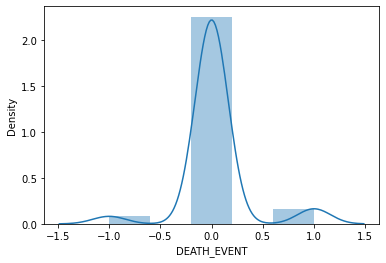

In [57]:
sns.distplot(y_test-predictions)

array([[-0.90959782, -0.80356416, -1.53055953, -1.05742724,  0.56204975,
         0.73568819,  0.20312668],
       [-1.45042893,  0.41003998,  1.4317681 , -0.45896603, -1.15778962,
        -1.35927151,  1.5453339 ],
       [-0.6104949 , -0.86593354, -1.53055953,  0.44343773,  0.56204975,
        -1.35927151, -1.12617471],
       [-0.7082721 , -0.75938585, -0.68418021, -1.41555257, -0.17502426,
         0.73568819, -0.23567184],
       [ 0.43715674, -0.75158968, -0.26099055, -1.05742724, -0.66640694,
         0.73568819,  0.82260694],
       [ 0.43715674, -0.66843051, -0.68418021, -1.05742724,  0.31635841,
        -1.35927151,  0.71936023],
       [ 0.02628569, -0.43454534, -0.68418021, -0.45896603,  0.07066707,
         0.73568819,  1.48080471],
       [-0.42035657, -0.8191565 , -0.26099055, -0.20334832,  0.56204975,
         0.73568819, -0.90677545],
       [ 0.81756392, -0.78537309,  0.58538877,  0.2446834 , -0.17502426,
         0.73568819, -1.34557396],
       [-1.45042893, -0.3020